In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf3 = pd.read_excel('data/xdata3.xlsx')
xdf4 = pd.read_excel('data/xdata4.xlsx')
xdf5 = pd.read_excel('data/xdata5.xlsx')
xdf6 = pd.read_excel('data/xdata6.xlsx')
ydf3 = pd.read_excel('data/ydata3.xlsx')
ydf4 = pd.read_excel('data/ydata4.xlsx')
ydf5 = pd.read_excel('data/ydata5.xlsx')
ydf6 = pd.read_excel('data/ydata6.xlsx')


xts3 = xdf3['#data']
yts3 = ydf3['#data']
xts4 = xdf4['#data']
yts4 = ydf4['#data']
xts5 = xdf5['#data']
yts5 = ydf5['#data']
xts6 = xdf6['#data']
yts6 = ydf6['#data']

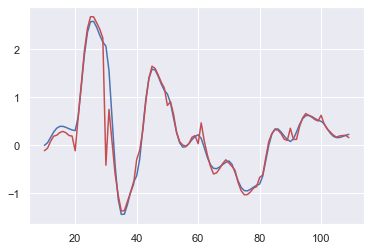

In [16]:
x = [] # train
y = [] # test (answer)
for i in range(0, 980):
        tmpX = []
        for j in range(0, 10):
            tmpX.append(xts3[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts3[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(10, 1)))
m.add(RepeatVector(1))
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

predict=[]
for i in range(0,100):
    input = np.array(xts3[i:i+10]) 
    input = input.reshape(1,10,1)
    yhat = m.predict(input)
    yhat = yhat.ravel()
    predict.append(yhat)
    
plt.plot(yts3[10:110])
xdata = np.arange(10,110,1)
plt.plot(xdata, predict, 'r')

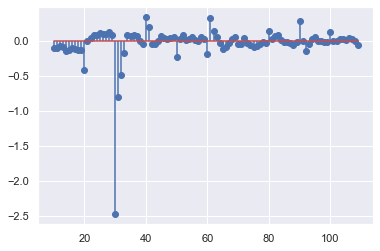

In [19]:
import matplotlib.pyplot as plt
from scipy import stats

predict=[]
for i in range(0,100):
    input = np.array(xts3[i:i+10]) 
    input = input.reshape(1,10,1)
    yhat = m.predict(input)
    yhat = yhat.ravel()
    yhat = yhat - yts3[i+10]
    predict.append(yhat)
    
    
fig, ax = plt.subplots()
ax.stem(xdata,predict, use_line_collection=True)
plt.show()

In [21]:
predict=[]
for i in range(0,100):
    input = np.array(xts3[i:i+10]) 
    input = input.reshape(1,10,1)
    yhat = m.predict(input)
    yhat = yhat.ravel()
    predict.append(yhat)
    s=(yts3[i+10]-yhat) ** 2
    t = +s
    
e=t/100
print(e)


[4.6474855e-05]


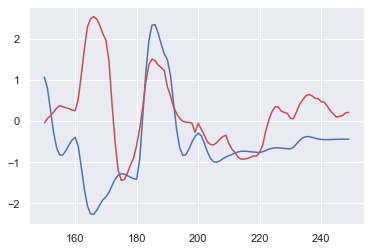

In [13]:
x = [] # train
y = [] # test (answer)
for i in range(0, 900):
        tmpX = []
        for j in range(0, 50):
            tmpX.append(xts3[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts3[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(50, 1)))
m.add(RepeatVector(1))
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

predict=[]
for i in range(0,100):
    input = np.array(xts3[i:i+50]) 
    input = input.reshape(1,50,1)
    yhat = m.predict(input)
    yhat = yhat.ravel()
    predict.append(yhat)
    
plt.plot(yts3[150:250])
xdata = np.arange(150,250,1)
plt.plot(xdata, predict, 'r')

In [ ]:
x = [] # train
y = [] # test (answer)
for i in range(0, 980):
        tmpX = []
        for j in range(0, 10):
            tmpX.append(xts3[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts3[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(10, 1)))
m.add(RepeatVector(3))
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

predict=[]
for i in range(0,100):
    input = np.array(xts3[i:i+10]) 
    input = input.reshape(1,10,1)
    yhat = m.predict(input)
    yhat = yhat.ravel()
    predict.append(yhat)
    
plt.plot(yts3[10:110])
xdata = np.arange(10,110,1)
plt.plot(xdata, predict, 'r')

[1.0814197e-06]


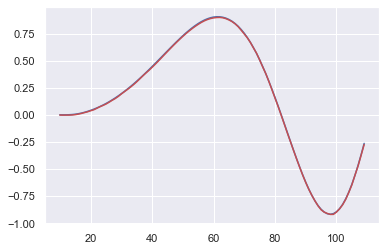

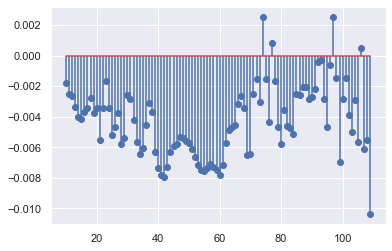

In [22]:
x = [] # train
y = [] # test (answer)
for i in range(0, 980):
        tmpX = []
        for j in range(0, 10):
            tmpX.append(xts4[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts4[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(10, 1)))
m.add(RepeatVector(1))
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

predict=[]
for i in range(0,100):
    input = np.array(xts4[i:i+10]) 
    input = input.reshape(1,10,1)
    yhat = m.predict(input)
    yhat = yhat.ravel()
    predict.append(yhat)
    s=(yts4[i+10]-yhat) ** 2
    t = +s
    
plt.plot(yts4[10:110])
xdata = np.arange(10,110,1)
plt.plot(xdata, predict, 'r')

e=t/100
print(e)

predict=[]
for i in range(0,100):
    input = np.array(xts4[i:i+10]) 
    input = input.reshape(1,10,1)
    yhat = m.predict(input)
    yhat = yhat.ravel()
    yhat = yhat - yts4[i+10]
    predict.append(yhat)
    
    
fig, ax = plt.subplots()
ax.stem(xdata,predict, use_line_collection=True)
plt.show()

[3.0931747e-06]


ValueError: could not broadcast input array from shape (200) into shape (100)

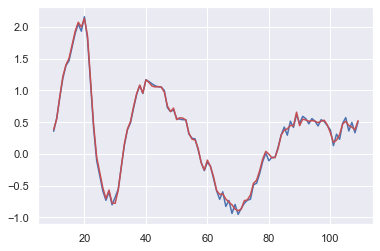

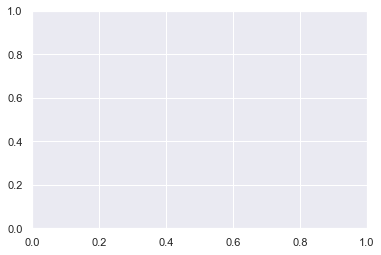

In [33]:
x = [] # train
y = [] # test (answer)
for i in range(0, 980):
        tmpX = []
        for j in range(0, 10):
            tmpX.append(xts5[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts5[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(10, 1)))
m.add(RepeatVector(1))
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

predict=[]
for i in range(0,100):
    input = np.array(xts5[i:i+10]) 
    input = input.reshape(1,10,1)
    yhat = m.predict(input)
    yhat = yhat.ravel()
    predict.append(yhat)
    s=(yts5[i+10]-yhat) ** 2
    t = +s
    
plt.plot(yts5[10:110])
xdata = np.arange(10,110,1)
plt.plot(xdata, predict, 'r')

e=t/100
print(e)


for i in range(0,100):
    input = np.array(xts5[i:i+10]) 
    input = input.reshape(1,10,1)
    yhat = m.predict(input)
    yhat = yhat.ravel()
    yhat = yhat - yts5[i+10]
    predict.append(yhat)
    
    
fig, ax = plt.subplots()
ax.stem(xdata,predict, use_line_collection=True)
plt.show()

ValueError: could not broadcast input array from shape (200) into shape (100)

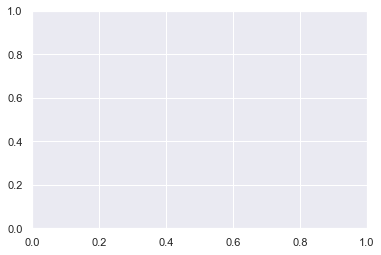

In [32]:
fig, ax = plt.subplots()
ax.stem(xdata,predict, use_line_collection=True)
plt.show()

In [ ]:
x = [] # train
y = [] # test (answer)


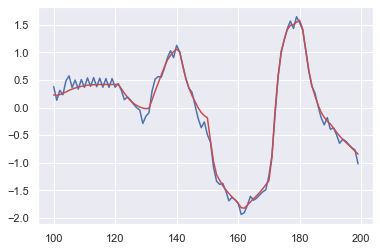

In [12]:
plt.plot(yts5[100:200])
xdata = np.arange(100,200,1)
plt.plot(xdata, predict, 'r')

[2.0132702e-06]


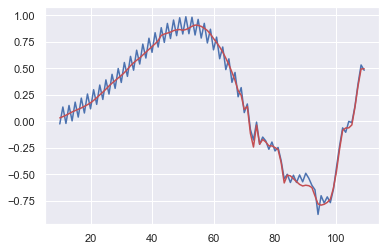

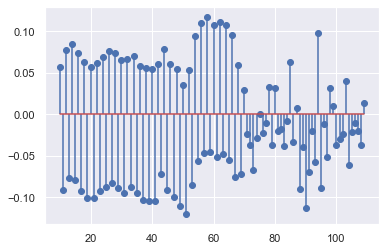

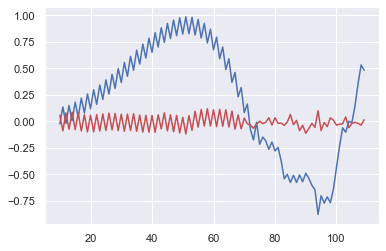

In [25]:
x = [] # train
y = [] # test (answer)
for i in range(0, 980):
        tmpX = []
        for j in range(0, 10):
            tmpX.append(xts6[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts6[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(10, 1)))
m.add(RepeatVector(1))
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

predict=[]
for i in range(0,100):
    input = np.array(xts6[i:i+10]) 
    input = input.reshape(1,10,1)
    yhat = m.predict(input)
    yhat = yhat.ravel()
    predict.append(yhat)
    s=(yts6[i+10]-yhat) ** 2
    t = +s
    
plt.plot(yts6[10:110])
xdata = np.arange(10,110,1)
plt.plot(xdata, predict, 'r')

e=t/100
print(e)

predict=[]
for i in range(0,100):
    input = np.array(xts6[i:i+10]) 
    input = input.reshape(1,10,1)
    yhat = m.predict(input)
    yhat = yhat.ravel()
    yhat = yhat - yts6[i+10]
    predict.append(yhat)
    
    
fig, ax = plt.subplots()
ax.stem(xdata,predict, use_line_collection=True)
plt.show()